In [1]:
import matplotlib.pyplot as plt

import sys
from pathlib import Path

def find_repo_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / 'pyproject.toml').exists():
            return p
    raise FileNotFoundError('pyproject.toml not found')

repo_root = find_repo_root(Path.cwd().resolve())
sys.path.append(str(repo_root))
from src.data.missingness_sim import simulate_missingness, MissingnessMechanism
from src.data.preprocessing import load_processed_ed_data

In [2]:
ed_triage = load_processed_ed_data()
mask_mcar = simulate_missingness(ed_triage, MissingnessMechanism.MCAR, rate=0.2, seed=42)
mask_mar = simulate_missingness(ed_triage, MissingnessMechanism.MAR, rate=0.2, seed=42)
mask_mnar = simulate_missingness(ed_triage, MissingnessMechanism.MNAR, rate=0.2, seed=42)

In [3]:
ed_triage_mcar = ed_triage.mask(~mask_mcar)
ed_triage_mar = ed_triage.mask(~mask_mar)
ed_triage_mnar = ed_triage.mask(~mask_mnar)

# remember that to filter out originally missing values, you must apply the below mask
original_observed = ed_triage.notna()

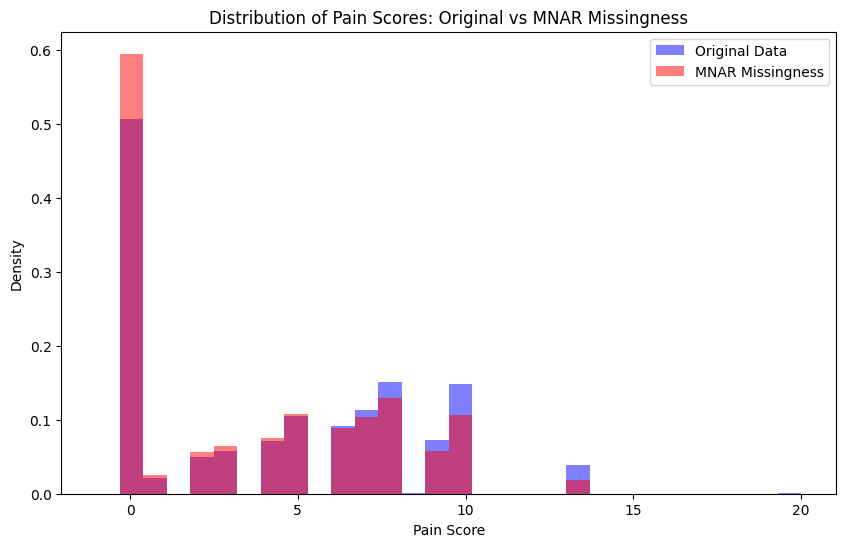

Avg pain original: 4.4259928383038645
Avg pain MNAR: 3.7076896991853263


In [4]:
# plot the average pain for ed_triage and ed_triage_mnar (only for originally observed values)
plt.figure(figsize=(10, 6))
plt.hist(ed_triage.loc[original_observed["pain"], "pain"].clip(-5, 20), bins=30, alpha=0.5, label="Original Data", color='blue', density=True)
plt.hist(ed_triage_mnar.loc[original_observed["pain"], "pain"].clip(-5, 20), bins=30, alpha=0.5, label="MNAR Missingness", color='red', density=True)
plt.xlabel("Pain Score")
plt.ylabel("Density")
plt.title("Distribution of Pain Scores: Original vs MNAR Missingness")
plt.legend()
plt.show()

print("Avg pain original:", ed_triage.loc[original_observed["pain"], "pain"].mean())
print("Avg pain MNAR:", ed_triage_mnar.loc[original_observed["pain"], "pain"].mean())

We can see here that higher pain scores are more likely to be missing with our simulated MNAR

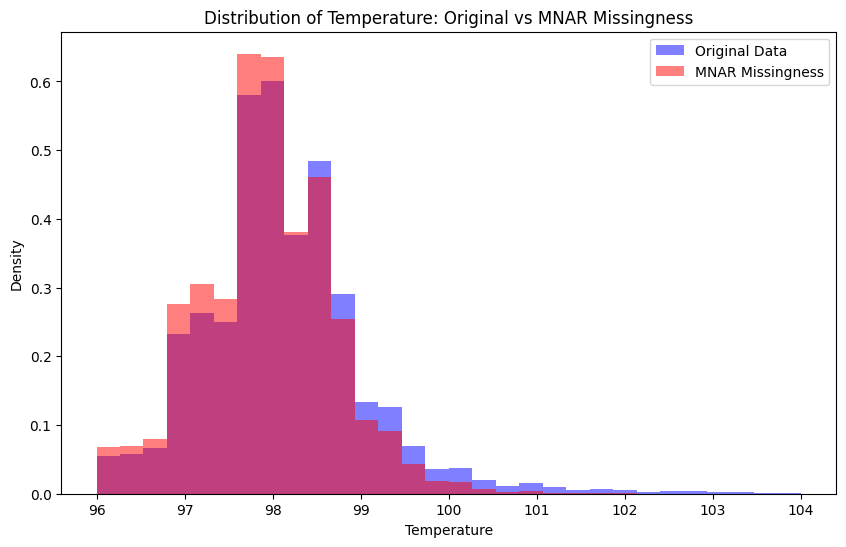

Avg temperature original: 98.09847472302607
Avg temperature MNAR: 97.92387075126821


In [5]:
plt.figure(figsize=(10, 6))
plt.hist(ed_triage.loc[original_observed["temperature"], "temperature"].clip(90, 150), bins=30, alpha=0.5, label="Original Data", color='blue', density=True)
plt.hist(ed_triage_mnar.loc[original_observed["temperature"], "temperature"].clip(90, 150), bins=30, alpha=0.5, label="MNAR Missingness", color='red', density=True)
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title("Distribution of Temperature: Original vs MNAR Missingness")
plt.legend()
plt.show()

print("Avg temperature original:", ed_triage.loc[original_observed["temperature"], "temperature"].mean())
print("Avg temperature MNAR:", ed_triage_mnar.loc[original_observed["temperature"], "temperature"].mean())